Assignment 3
Abijith Suresh KM
8899968


In [37]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

Part 1

In [38]:
# Load the Iris dataset
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
# Keep only 'petal width' and 'petal length' features
irisData = iris_data[['petal length (cm)', 'petal width (cm)']]
irisData.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [40]:
scaler = StandardScaler()
scaled_iris_data = scaler.fit_transform(iris_data)

d:\College Stuff\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\College Stuff\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\College Stuff\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


d:\College Stuff\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\College Stuff\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\College Stuff\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\College Stuff\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

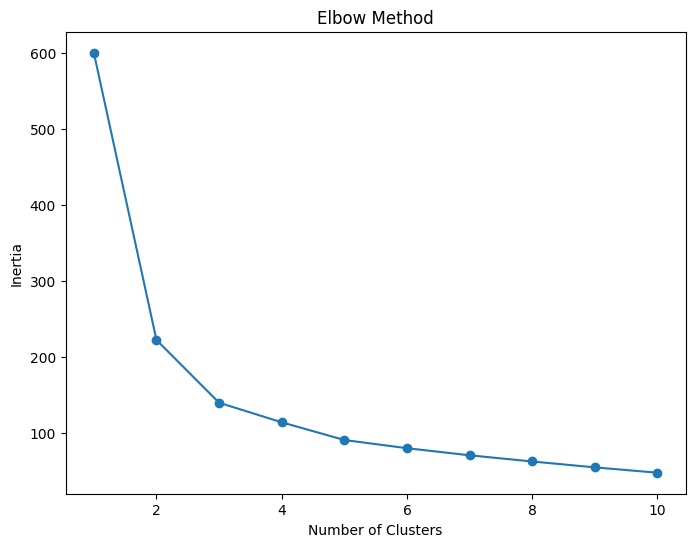

In [41]:
# Elbow Method to find optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_iris_data)
    inertia.append(kmeans.inertia_)
# Ploting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()    


Part 2

Load heart disease dataset in pandas dataframe

In [42]:
heartData = pd.read_csv("./heart.csv")
heartData.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3



In [43]:
# Calculate Z-scores for numeric columns
z_scores = np.abs(stats.zscore(heartData.select_dtypes(include=['int64', 'float64'])))

filter_con = (z_scores < 3).all(axis=1)

# Remove outliers
heartData = heartData[filter_con]

Convert text columns to numbers using label encoding / one hot encoding

In [44]:
# text columns
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Do label encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    heartData[col] = label_encoder.fit_transform(heartData[col])

Apply scaling



In [45]:
scaler = StandardScaler()
# Splitting the data
X = heartData.drop('HeartDisease', axis=1)
y = heartData['HeartDisease']

X_scaled = scaler.fit_transform(X)
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG   
0     40    1              1        140          289          0           1  \
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy

In [46]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [47]:
# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm_model = svm_model.predict(X_test)


In [48]:
print("Accuracy" , accuracy_score(y_test, y_pred_svm_model))
print("Recall" ,recall_score(y_test, y_pred_svm_model))
print("Precision" ,precision_score(y_test, y_pred_svm_model))
print("F1 score" ,f1_score(y_test, y_pred_svm_model))


Accuracy 0.8666666666666667
Recall 0.9361702127659575
Precision 0.8301886792452831
F1 score 0.88


Logistic regression


In [49]:
# Logistic Regression model
logisticModel = LogisticRegression()
logisticModel.fit(X_train, y_train)
y_pred_log_model = logisticModel.predict(X_test)


In [50]:
print("Accuracy" , accuracy_score(y_test, y_pred_log_model))
print("Recall" ,recall_score(y_test, y_pred_log_model))
print("Precision" ,precision_score(y_test, y_pred_log_model))
print("F1 score" ,f1_score(y_test, y_pred_log_model))

Accuracy 0.8555555555555555
Recall 0.925531914893617
Precision 0.8207547169811321
F1 score 0.8700000000000001


Random Forest


In [51]:
randomForestModel = RandomForestClassifier(n_estimators=500, max_samples=0.8, oob_score=True, random_state=16)
randomForestModel.fit(X_train, y_train)
y_pred_rf_model = randomForestModel.predict(X_test)


In [52]:
print("Accuracy" , accuracy_score(y_test, y_pred_rf_model))
print("Recall" ,recall_score(y_test, y_pred_rf_model))
print("Precision" ,precision_score(y_test, y_pred_rf_model))
print("F1 score" ,f1_score(y_test, y_pred_rf_model))

Accuracy 0.8444444444444444
Recall 0.925531914893617
Precision 0.8055555555555556
F1 score 0.8613861386138614


Observations :  It appears that the SVM model achieved the highest accuracy and F1 score among the three models, closely followed by the Logistic Regression model. The Random Forest model also performed reasonably well but had slightly lower accuracy and F1 score.